<a href="https://colab.research.google.com/github/anuradhaboche/titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/train.csv")
test = pd.read_csv("/content/drive/My Drive/test.csv")
test.columns , dataset.columns

(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [ ]:
dataset.shape

(891, 12)

In [ ]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kennedy, Mr. John",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
dataset.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carrau, Mr. Francisco M",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Add title
dataset['Title']=''
dataset.loc[dataset['Name'].str.contains('Master'), 'Title'] = 'Master'
dataset.loc[dataset['Name'].str.contains('Mr.'), 'Title'] = 'Mr.'
dataset.loc[dataset['Name'].str.contains('Mrs.'), 'Title'] = 'Mrs.'
dataset.loc[dataset['Name'].str.contains('Miss.'), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Dr.'), 'Title'] = 'Doctor'
dataset.loc[dataset['Name'].str.contains('Major'), 'Title'] = 'Major'
dataset.loc[dataset['Name'].str.contains('Col.'), 'Title'] = 'Colonel'
dataset.loc[dataset['Name'].str.contains('Capt.'), 'Title'] = 'Captain'
dataset.loc[dataset['Name'].str.contains('Rev.'), 'Title'] = 'Reverand'
dataset.loc[dataset['Name'].str.contains('Mlle.'), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Mme.'), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Ms.'), 'Title'] = 'Miss'
dataset.loc[dataset['Name'].str.contains('Jonkheer'), 'Title'] = 'Royal'
dataset.loc[dataset['Name'].str.contains('Countess'), 'Title'] = 'Royal'
dataset.loc[dataset['Name'].str.contains('Manuel'), 'Title'] = 'Mr.'
dataset.Title.unique()
dataset[dataset['Title']=='']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [ ]:
test['Title']=''
test.loc[test['Name'].str.contains('Master'), 'Title'] = 'Master'
test.loc[test['Name'].str.contains('Mr.'), 'Title'] = 'Mr.'
test.loc[test['Name'].str.contains('Mrs.'), 'Title'] = 'Mrs.'
test.loc[test['Name'].str.contains('Miss.'), 'Title'] = 'Miss'
test.loc[test['Name'].str.contains('Dr.'), 'Title'] = 'Doctor'
test.loc[test['Name'].str.contains('Major'), 'Title'] = 'Major'
test.loc[test['Name'].str.contains('Col.'), 'Title'] = 'Colonel'
test.loc[test['Name'].str.contains('Capt.'), 'Title'] = 'Captain'
test.loc[test['Name'].str.contains('Rev.'), 'Title'] = 'Reverand'
test.loc[test['Name'].str.contains('Mlle.'), 'Title'] = 'Miss'
test.loc[test['Name'].str.contains('Mme.'), 'Title'] = 'Miss'
test.loc[test['Name'].str.contains('Ms.'), 'Title'] = 'Miss'
test.loc[test['Name'].str.contains('Jonkheer'), 'Title'] = 'Royal'
test.loc[test['Name'].str.contains('Countess'), 'Title'] = 'Royal'
test.loc[test['Name'].str.contains('Manuel'), 'Title'] = 'Mr.'
test.loc[test['Name'].str.contains('Dona.'), 'Title'] = 'Miss'
test.Title.unique()
test[test['Title']=='']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [ ]:
test[test.Age.isna()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,Mr.
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,Mrs.
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,Mr.
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Mrs.
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr.


In [ ]:
#Source: Kaggle discussion
dataset.groupby(['Pclass','Sex'])['Age'].agg(['mean','median']).round(1)

mean  median
Pclass Sex                 
1      female  34.6    35.0
       male    41.3    40.0
2      female  28.7    28.0
       male    30.7    30.0
3      female  21.8    21.5
       male    26.5    25.0

In [ ]:
#Age is Nan- 177 rows , dataset[dataset.Age.isna()]
dataset.groupby(['Pclass','Title'])['Age'].agg(['mean','median']).round(1)

mean  median
Pclass Title                 
1      Captain   70.0    70.0
       Colonel   54.3    56.0
       Doctor    42.2    44.0
       Major     48.5    48.5
       Master     5.3     4.0
       Miss      29.6    29.5
       Mr.       41.6    40.0
       Mrs.      41.1    43.0
       Royal     35.5    35.5
2      Colonel   25.4    29.0
       Doctor    37.0    34.0
       Master     2.3     1.0
       Miss      23.0    24.0
       Mr.       32.9    31.0
       Mrs.      33.7    32.0
       Reverand  43.2    46.5
3      Colonel   30.0    30.0
       Doctor    33.0    33.0
       Master     5.4     4.0
       Miss      16.1    18.0
       Mr.       28.7    26.0
       Mrs.      33.5    31.0

In [ ]:
# Miss can be a child or young_adult or an adult
print ("Avg age of 'Miss' Title", round(dataset[dataset.Title=="Miss"]['Age'].mean()))
print ("Avg age of 'Miss' Title travelling without Parents", round(dataset[(dataset.Title=="Miss") & (dataset.Parch==0)]['Age'].mean()))
print ("Avg age of 'Miss' Title travelling with Parents", round(dataset[(dataset.Title=="Miss") & (dataset.Parch!=0)]['Age'].mean()), '\n')

Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 28
Avg age of 'Miss' Title travelling with Parents 12 



In [ ]:
#Group by Pclass and with/without parent age, if parch=0 meaning travelling alone
print('PArch!=0', '\n', dataset[(dataset.Title=="Miss") & (dataset.Parch!=0)].groupby('Pclass')['Age'].mean().round())
print('\n','PArch==0', '\n',dataset[(dataset.Title=="Miss") & (dataset.Parch==0)].groupby('Pclass')['Age'].mean().round())

PArch!=0 
 Pclass
1    21.0
2    11.0
3     7.0
Name: Age, dtype: float64

 PArch==0 
 Pclass
1    34.0
2    30.0
3    22.0
Name: Age, dtype: float64


In [ ]:
dataset.loc[ (dataset.Title=="Miss") & (dataset.Parch!=0) & (dataset.Age.isna())& (dataset.Pclass==3),'Age' ]=7
dataset.loc[ (dataset.Title=="Miss") & (dataset.Parch==0) & (dataset.Age.isna())& (dataset.Pclass==1),'Age' ]=34
dataset.loc[ (dataset.Title=="Miss") & (dataset.Parch==0) & (dataset.Age.isna())& (dataset.Pclass==2),'Age' ]=30
dataset.loc[ (dataset.Title=="Miss") & (dataset.Parch==0) & (dataset.Age.isna())& (dataset.Pclass==3),'Age' ]=22

In [ ]:
dataset.groupby(['Pclass','Sex','Title'])[['Age']].mean()

Age
Pclass Sex    Title              
1      female Doctor    49.000000
              Miss      29.714286
              Mrs.      41.085714
              Royal     33.000000
       male   Captain   70.000000
              Colonel   54.333333
              Doctor    40.500000
              Major     48.500000
              Master     5.306667
              Mr.       41.649425
              Royal     38.000000
2      female Colonel   19.500000
              Doctor    34.000000
              Miss      23.426471
              Mrs.      33.743590
       male   Colonel   29.333333
              Doctor    38.500000
              Master     2.258889
              Mr.       32.898734
              Reverand  43.166667
3      female Doctor          NaN
              Miss      16.648515
              Mrs.      33.515152
       male   Colonel   30.000000
              Doctor    33.000000
              Master     5.350833
              Mr.       28.694690

In [ ]:
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='female') & (dataset.Pclass==1)), 'Age']=49
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='male') & (dataset.Pclass==1)), 'Age']=40
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mrs.') & (dataset.Sex=='female') & (dataset.Pclass==1)), 'Age']=41
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mr.') & (dataset.Sex=='male') & (dataset.Pclass==1)), 'Age']=41.67
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Master') & (dataset.Sex=='male') & (dataset.Pclass==1)), 'Age']=5

dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='female') & (dataset.Pclass==2)), 'Age']=34
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='male') & (dataset.Pclass==2)), 'Age']=38
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mrs.') & (dataset.Sex=='female') & (dataset.Pclass==2)), 'Age']=34
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mr.') & (dataset.Sex=='male') & (dataset.Pclass==2)), 'Age']=33
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Master') & (dataset.Sex=='male') & (dataset.Pclass==2)), 'Age']=2

# dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='female') & (dataset.Pclass==3)), 'Age']=34
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='male') & (dataset.Pclass==3)), 'Age']=33
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mrs.') & (dataset.Sex=='female') & (dataset.Pclass==3)), 'Age']=34
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Mr.') & (dataset.Sex=='male') & (dataset.Pclass==3)), 'Age']=29
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Master') & (dataset.Sex=='male') & (dataset.Pclass==3)), 'Age']=5


In [ ]:
dataset[dataset.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.75,NaN,Q,Doctor


In [ ]:
dataset.groupby(['Title'])['Age'].mean()

Title
Captain     70.000000
Colonel     35.000000
Doctor      39.500000
Major       48.500000
Master       4.616750
Miss        21.380435
Mr.         32.187671
Mrs.        36.241935
Reverand    43.166667
Royal       35.500000
Name: Age, dtype: float64

In [ ]:
dataset.loc[(dataset.Age.isna() & (dataset.Title=='Doctor') & (dataset.Sex=='female') & (dataset.Pclass==3)), 'Age']=39.55

#Age doesnot have any Nans
dataset[dataset.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [ ]:
dataset['Age_Est']=''
dataset.loc[ (dataset.Age>0.00) & (dataset.Age<=12.00), 'Age_Est' ] = 'child'
dataset.loc[ (dataset.Age>12.00) & (dataset.Age<=19.00), 'Age_Est' ] = 'teen'
dataset.loc[ (dataset.Age>19.00) & (dataset.Age<=25.00) , 'Age_Est'] = 'young_adult'
dataset.loc[ (dataset.Age>25.00) & (dataset.Age<=60.00), 'Age_Est' ]= 'adult'
dataset.loc[ (dataset.Age>60.00) & (dataset.Age<=80.00), 'Age_Est' ]= 'old'

In [ ]:
# no Nans in Age_Est
dataset[(dataset['Age_Est']=='')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est


In [ ]:
print ("Avg age of 'Miss' Title", round(test[test.Title=="Miss"]['Age'].mean()))
print ("Avg age of 'Miss' Title travelling without Parents", round(test[(test.Title=="Miss") & (test.Parch==0)]['Age'].mean()))
print ("Avg age of 'Miss' Title travelling with Parents", round(test[(test.Title=="Miss") & (test.Parch!=0)]['Age'].mean()))
print('PArch!=0', '\n', test[(test.Title=="Miss") & (test.Parch!=0)].groupby('Pclass')['Age'].mean().round())
print('\n','PArch==0', '\n',test[(test.Title=="Miss") & (test.Parch==0)].groupby('Pclass')['Age'].mean().round())

Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 27
Avg age of 'Miss' Title travelling with Parents 13
PArch!=0 
 Pclass
1    24.0
2    13.0
3     9.0
Name: Age, dtype: float64

 PArch==0 
 Pclass
1    35.0
2    23.0
3    24.0
Name: Age, dtype: float64


In [ ]:
test.loc[ (test.Title=="Miss") & (test.Parch!=0) & (test.Age.isna())& (test.Pclass==3),'Age' ]=9
test.loc[ (test.Title=="Miss") & (test.Parch==0) & (test.Age.isna())& (test.Pclass==1),'Age' ]=33
test.loc[ (test.Title=="Miss") & (test.Parch==0) & (test.Age.isna())& (test.Pclass==2),'Age' ]=23
test.loc[ (test.Title=="Miss") & (test.Parch==0) & (test.Age.isna())& (test.Pclass==3),'Age' ]=24
# test[(test.Title=='Miss') & (test.Title.isna())]

In [ ]:
test.groupby(['Pclass','Sex','Title'])['Age'].agg(['mean','median']).round(1)

mean  median
Pclass Sex    Title                 
1      female Doctor    58.0    58.0
              Miss      31.4    32.0
              Miss.     43.5    43.5
              Mrs.      45.1    48.0
       male   Colonel   50.0    50.0
              Doctor    53.0    53.0
              Master     9.5     9.5
              Mr.       41.2    42.0
2      female Colonel   30.0    30.0
              Miss      17.4    19.5
              Mrs.      33.2    29.0
       male   Colonel   24.0    24.0
              Doctor    23.3    20.0
              Master     2.0     2.0
              Mr.       31.9    28.5
              Reverand  35.5    35.5
3      female Doctor    23.0    23.0
              Miss      20.8    24.0
              Mrs.      29.9    28.0
       male   Colonel   24.0    24.0
              Master     7.5     7.0
              Mr.       27.2    25.0

In [ ]:
test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='female') & (test.Pclass==1)), 'Age']=58
test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='male') & (test.Pclass==1)), 'Age']=53
test.loc[(test.Age.isna() & (test.Title=='Mrs.') & (test.Sex=='female') & (test.Pclass==1)), 'Age']=45
test.loc[(test.Age.isna() & (test.Title=='Mr.') & (test.Sex=='male') & (test.Pclass==1)), 'Age']=41
test.loc[(test.Age.isna() & (test.Title=='Master') & (test.Sex=='male') & (test.Pclass==1)), 'Age']=9.5

# test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='female') & (test.Pclass==2)), 'Age']=34
test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='male') & (test.Pclass==2)), 'Age']=23
test.loc[(test.Age.isna() & (test.Title=='Mrs.') & (test.Sex=='female') & (test.Pclass==2)), 'Age']=33
test.loc[(test.Age.isna() & (test.Title=='Mr.') & (test.Sex=='male') & (test.Pclass==2)), 'Age']=32
test.loc[(test.Age.isna() & (test.Title=='Master') & (test.Sex=='male') & (test.Pclass==2)), 'Age']=2

test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='female') & (test.Pclass==3)), 'Age']=23
# test.loc[(test.Age.isna() & (test.Title=='Doctor') & (test.Sex=='male') & (test.Pclass==3)), 'Age']=33
test.loc[(test.Age.isna() & (test.Title=='Mrs.') & (test.Sex=='female') & (test.Pclass==3)), 'Age']=30
test.loc[(test.Age.isna() & (test.Title=='Mr.') & (test.Sex=='male') & (test.Pclass==3)), 'Age']=27
test.loc[(test.Age.isna() & (test.Title=='Master') & (test.Sex=='male') & (test.Pclass==3)), 'Age']=7.5
test[test.Age.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [ ]:

test['Age_Est']=''
test.loc[ (test.Age>0.00) & (test.Age<=12.00), 'Age_Est' ] = 'child'
test.loc[ (test.Age>12.00) & (test.Age<=19.00), 'Age_Est' ] = 'teen'
test.loc[ (test.Age>19.00) & (test.Age<=25.00) , 'Age_Est'] = 'young_adult'
test.loc[ (test.Age>25.00) & (test.Age<=60.00), 'Age_Est' ]= 'adult'
test.loc[ (test.Age>60.00) & (test.Age<=80.00), 'Age_Est' ]= 'old'
test[test.Age_Est.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est


In [ ]:
#15 people were travelling without fare
dataset[(dataset['Fare']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est
179,180,0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,NaN,S,Mr.,adult
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,B94,S,Mr.,adult
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,NaN,S,Mr.,young_adult
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,33.00,0,0,239853,0.0,NaN,S,Mr.,adult
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,NaN,S,Mr.,teen
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.00,0,0,239853,0.0,NaN,S,Mr.,adult
466,467,0,2,"Campbell, Mr. William",male,33.00,0,0,239853,0.0,NaN,S,Mr.,adult
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.00,0,0,239854,0.0,NaN,S,Mr.,adult
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,NaN,S,Mr.,adult
633,634,0,1,"Parr, Mr. William Henry Marsh",male,41.67,0,0,112052,0.0,NaN,S,Mr.,adult


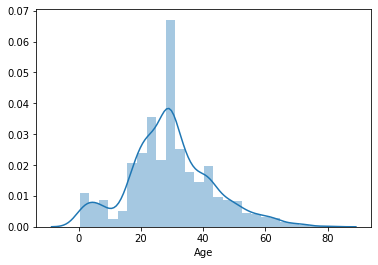

In [ ]:
#Age -approx. normal
sns.distplot(dataset['Age'])


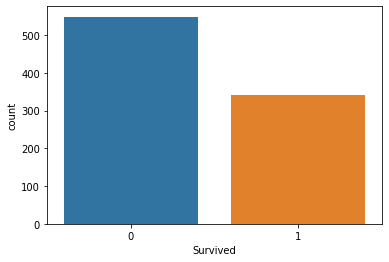

In [ ]:
sns.countplot(x=dataset['Survived'])

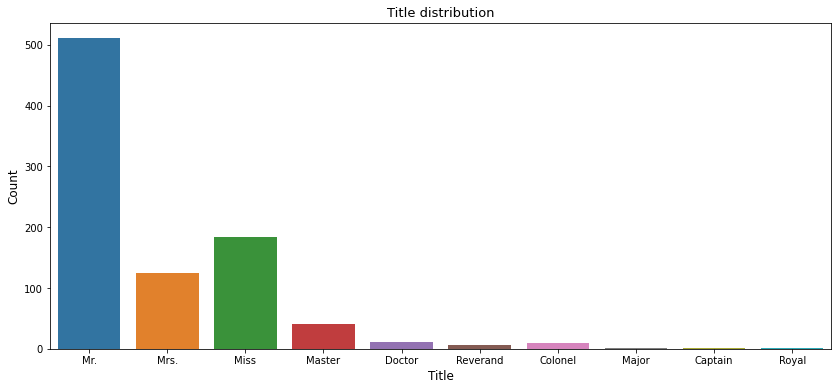

In [ ]:
#more Mr. and miss
from matplotlib import pyplot as plt
plt.figure(figsize=(14 ,6))
sns.countplot(dataset['Title'])
# groupindex=dataset.Title.value_counts()
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Title distribution', fontsize=13)
plt.show()

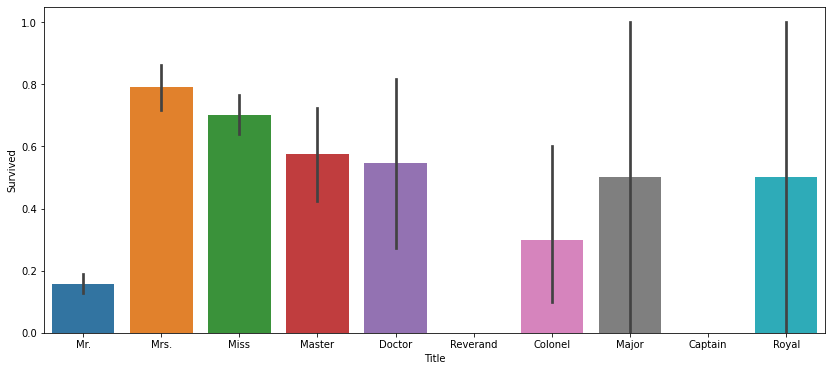

In [ ]:
#Despite there were more men, more Mrs. miss, master, doctors, majors and royals survived.
plt.figure(figsize=(14 ,6))
sns.barplot(x='Title', y='Survived', data=dataset)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,young_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,adult


In [ ]:
dataset.columns[dataset.isna().any()].tolist() 

['Cabin', 'Embarked']

In [ ]:
dataset[dataset['Embarked'].isnull().values]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs.,old


In [ ]:
dataset.Embarked.unique().tolist()

['S', 'C', 'Q', nan]

In [ ]:
dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
dataset['Embarked']= dataset['Embarked'].replace(np.nan, 'S')

In [ ]:
test[test.Embarked.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est


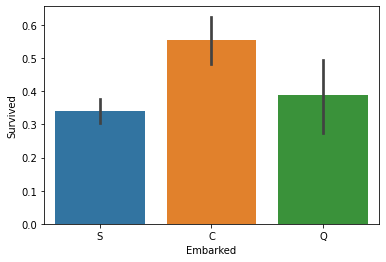

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=dataset)

In [ ]:
dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
dataset['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
dataset['Cabin']=dataset['Cabin'].replace(np.nan, 'X')

In [ ]:
dataset['Deck']=''
dataset.loc[dataset.Cabin.str.contains('A'), 'Deck']='A'
dataset.loc[dataset.Cabin.str.contains('B'), 'Deck']='B'
dataset.loc[dataset.Cabin.str.contains('C'), 'Deck']='C'
dataset.loc[dataset.Cabin.str.contains('D'), 'Deck']='D'
dataset.loc[dataset.Cabin.str.contains('E'), 'Deck']='E'
dataset.loc[dataset.Cabin.str.contains('F'), 'Deck']='F'
dataset.loc[dataset.Cabin.str.contains('G'), 'Deck']='G'
dataset.loc[dataset.Cabin.str.contains('T'), 'Deck']='T'
dataset.loc[dataset.Cabin.str.contains('X'), 'Deck']='X'

In [ ]:
dataset[dataset.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est,Deck


In [ ]:
test[test.Cabin.isna()]
test['Cabin']=test['Cabin'].replace(np.nan, 'X')
test['Deck']=''
test.loc[test.Cabin.str.contains('A'), 'Deck']='A'
test.loc[test.Cabin.str.contains('B'), 'Deck']='B'
test.loc[test.Cabin.str.contains('C'), 'Deck']='C'
test.loc[test.Cabin.str.contains('D'), 'Deck']='D'
test.loc[test.Cabin.str.contains('E'), 'Deck']='E'
test.loc[test.Cabin.str.contains('F'), 'Deck']='F'
test.loc[test.Cabin.str.contains('G'), 'Deck']='G'
test.loc[test.Cabin.str.contains('T'), 'Deck']='T'
test.loc[test.Cabin.str.contains('X'), 'Deck']='X'

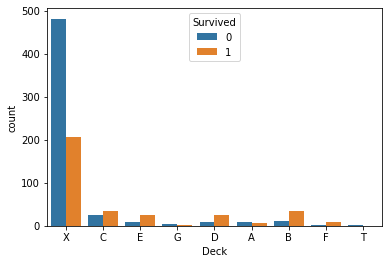

In [ ]:
sns.countplot(x='Deck', hue='Survived', data=dataset)

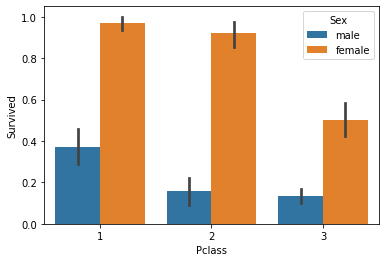

In [ ]:
# Female survived more than male
sns.barplot(x='Pclass',y='Survived', data=dataset, hue='Sex')

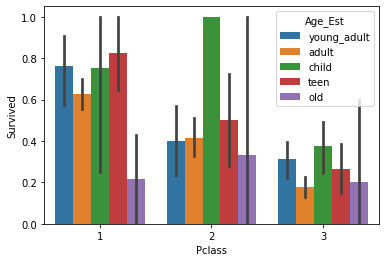

In [ ]:
#Children survived more than adults
sns.barplot(x='Pclass',y='Survived', data=dataset, hue='Age_Est')

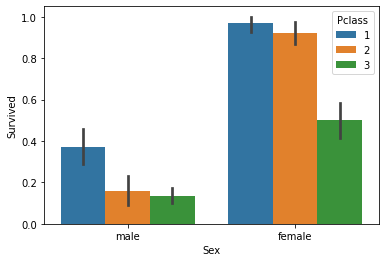

In [ ]:
#Women in first class survived more
sns.barplot(x='Sex',y='Survived', data=dataset, hue='Pclass')

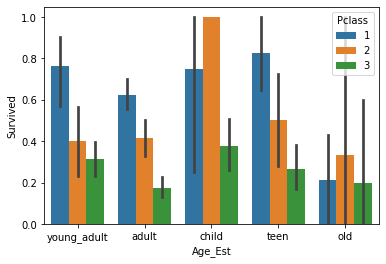

In [ ]:
# Children survived more in irrespective of class
sns.barplot(x='Age_Est',y='Survived', data=dataset, hue='Pclass')

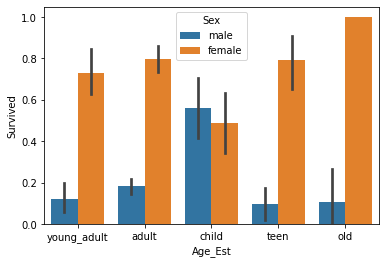

In [ ]:
#female survived more
sns.barplot(x='Age_Est',y='Survived', data=dataset, hue='Sex')

In [ ]:
dataset.to_pickle('/content/drive/My Drive/titanic.pkl')
test.to_pickle('/content/drive/My Drive/test.pkl')

In [ ]:
dataset= pd.read_pickle('/content/drive/My Drive/titanic.pkl')
test= pd.read_pickle('/content/drive/My Drive/test.pkl')

In [ ]:
# dataset.Embarked= pd.Categorical(dataset.Embarked)
# dataset['Embarked']= dataset.Embarked.cat.codes
# dataset.Title= pd.Categorical(dataset.Title)
# dataset['Title']= dataset.Title.cat.codes
# dataset.Age_Est= pd.Categorical(dataset.Age_Est)
# dataset['Age_Est']= dataset.Age_Est.cat.codes
# dataset.deck= pd.Categorical(dataset.deck)
# dataset['Deck']= dataset.deck.cat.codes
# dataset.Sex= pd.Categorical(dataset.Sex)
# dataset['Sex']= dataset.Sex.cat.codes

In [ ]:
dict= {'Embarked': {'S':0, 'C':1, 'Q':2},
       'Title': {'Mr.':0,'Mrs.':1, 'Miss':2, 'Master':3, 'Doctor':4, 'Reverand':5, 'Colonel':6, 'Major':7, 'Captain':8, 'Royal':9},
       'Age_Est':{'young_adult':0,'adult':1, 'child':2, 'teen':3, 'old':4},
       'Deck':{'X':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8},
       'Sex':{'male':0, 'female':1}
}
dataset=dataset.replace(dict)
test=test.replace(dict)
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,0,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,0,0,1,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Est,Deck
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,X,2,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,X,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,X,2,0,4,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,X,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,X,0,1,0,0


In [ ]:
# final_dataset= dataset
dataset.to_pickle('/content/drive/My Drive/titanic_coded.pkl')
test.to_pickle('/content/drive/My Drive/test.pkl')

In [ ]:
features=['Pclass','Sex','Age','SibSp','Parch','Embarked','Title','Age_Est','Deck']
X_train = dataset[features]
y_train= dataset["Survived"]
X_test= test[features]

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
y_hat= lr.predict(X_test)
lr_accuracy = round(lr.score(X_train, y_train) * 100, 2)
lr_accuracy


80.25

In [229]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=2).fit(X_train, y_train)
y_hat= rf.predict(X_test)
rf_accuracy= round(rf.score(X_train, y_train)*100,2)
rf_accuracy

94.73

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {n_estimators: {100,300,500},
             }

In [228]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
y_hat= svc.predict(X_test)
svc_accuracy = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy

70.37

In [ ]:
# dataset.shape
#dataset[dataset.Cabin.isna()]
# dataset[dataset.Age.isna()]
# dataset[dataset.Embarked.isna()]
#dataset.profile_report()
# X= dataset.iloc[:,2:12]
# y= dataset.iloc[:,[1]]
# dataset['cabin_cat']=pd.Series()
# dataset.loc[dataset.Cabin.str.contains('A'),'cabin_cat']= 'A'
# dataset.Age.isna().sum()
# dataset.info()
# dataset.describe()
# dataset[dataset['Age']<=1]
#dataset.Cabin.isna().sum()
#  dataset[dataset['Survived']==1][['Sex','Age','Survived']]
# import plotly.express as px
# dataset[['Sex','Age','Survived']]
# figure= px.bar(dataset, x= 'Sex', y='Survived')
# figure.show()
# dataset['Age_Est']=''
# dataset.loc[dataset['Name'].str.contains('Master'), 'Age_Est'] = 'child'
# dataset.loc[dataset['Name'].str.contains('Miss'), 'Age_Est'] = 'child'
# dataset.loc[dataset['Name'].str.contains('Mr'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Mrs'), 'Age_Est'] = 'adult'
# dataset.head(20)
# dataset[dataset['Age_Est']=='']
# dataset.loc[dataset['Name'].str.contains('Ms.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Major'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Dr.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Col.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Capt'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Rev.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Mlle.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Mme.'), 'Age_Est'] = 'adult'
# ages=[40,33,38]
# dataset.loc[dataset.Age.isin(ages), 'Age_Est'] = "adult"
# dataset.head()
# dataset[dataset['Age_Est']=='']
# dataset[(dataset['Age_Est']=='adult') & (dataset['Age'].isin(range(18)))][['Name','Age', 'Age_Est']]
#Age is above 18, adult
# adult_age=[i for i in range(18,80)]
# dataset.loc[dataset['Age'].isin(adult_age),'Age_Est' ]='adult'
#dataset[dataset['Age_Est']=='adult']

#Age is Nan
# dataset.loc[dataset['Name'].str.contains('Master'), 'Age_Est'] = 'child'
# dataset.loc[dataset['Name'].str.contains('Mr.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Mrs.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Miss.'), 'Age_Est'] = 'adult'
# dataset.loc[dataset['Name'].str.contains('Dr.'), 'Age_Est'] = 'adult'
# dataset.Age_Est.unique()

# dataset['Age_Est']=''
# child_age= [i for i in np.arange(0,12,0.5)]
# dataset.loc[dataset['Age'].isin(child_age),'Age_Est' ]='child'

# teen_age= [i for i in np.arange(12,19,0.5)]
# dataset.loc[dataset['Age'].isin(teen_age),'Age_Est' ]='teen'

# young_age= [i for i in np.arange(19,25,0.5)]
# dataset.loc[dataset['Age'].isin(young_age),'Age_Est' ]='young_adult'

# adult_age= [i for i in np.arange(25,60,0.5)]
# dataset.loc[dataset['Age'].isin(adult_age),'Age_Est' ]='adult'

# old_age= [i for i in np.arange(60,80,0.5)]
# dataset.loc[dataset['Age'].isin(old_age),'Age_Est' ]='old'



# adult_age= [i for i in np.arange(25,60,0.5)]